In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os

%matplotlib inline
warnings.filterwarnings('ignore')

FinanceDataReader는 주가 데이터를 편리하게 가져올 수 있는 파이썬 패키지입니다.

In [2]:
!pip install finance-datareader

In [3]:
import FinanceDataReader as fdr

In [4]:
A = fdr.DataReader('SPY', '2020-01-01')

In [5]:
A 

,Close,Open,High,Low,Volume,Change
Date,,,,,,
2020-01-02,324.87,323.54,324.89,322.53,59250000.0,0.0094
2020-01-03,322.41,321.16,323.64,321.10,77780000.0,-0.0076
2020-01-06,323.64,320.49,323.73,320.36,55760000.0,0.0038
2020-01-07,322.73,323.02,323.54,322.24,42850000.0,-0.0028
2020-01-08,324.45,322.94,325.78,322.67,68430000.0,0.0053
...,...,...,...,...,...,...
2021-12-13,466.57,470.19,470.56,466.27,84990000.0,-0.0089
2021-12-14,463.36,463.09,465.74,460.25,95490000.0,-0.0069
2021-12-15,470.60,463.42,470.86,460.74,115780000.0,0.0156


In [6]:
A.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 496 entries, 2020-01-02 to 2021-12-17
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   496 non-null    float64
 1   Open    496 non-null    float64
 2   High    496 non-null    float64
 3   Low     496 non-null    float64
 4   Volume  496 non-null    float64
 5   Change  496 non-null    float64
dtypes: float64(6)
memory usage: 27.1 KB


In [7]:
A.describe()

,Close,Open,High,Low,Volume,Change
count,496.000000,496.000000,496.000000,496.000000,4.960000e+02,496.000000
mean,371.897621,371.838972,374.171653,369.323508,8.752464e+07,0.000849
std,59.812495,59.839043,59.085384,60.452480,5.465673e+07,0.016123
min,222.950000,228.190000,229.680000,218.260000,2.646000e+07,-0.109400
25%,326.642500,326.435000,327.895000,323.585000,5.494250e+07,-0.004600
50%,370.120000,370.350000,372.480000,367.885000,7.184500e+07,0.001700
75%,425.002500,425.060000,425.467500,423.212500,9.759250e+07,0.007900
max,470.740000,472.570000,473.520000,468.500000,3.922200e+08,0.090600


#Prophet

In [8]:
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, plot_components_plotly

In [9]:
#반드시 y 컬럼과 ds 컬럼이 존재해야합니다.
#예측 값은 y, 시계열 데이터는 ds에 지정합니다.
A['y'] = A['Close']
A['ds'] = A.index

In [10]:
A 

,Close,Open,High,Low,Volume,Change,y,ds
Date,,,,,,,,
2020-01-02,324.87,323.54,324.89,322.53,59250000.0,0.0094,324.87,2020-01-02
2020-01-03,322.41,321.16,323.64,321.10,77780000.0,-0.0076,322.41,2020-01-03
2020-01-06,323.64,320.49,323.73,320.36,55760000.0,0.0038,323.64,2020-01-06
2020-01-07,322.73,323.02,323.54,322.24,42850000.0,-0.0028,322.73,2020-01-07
2020-01-08,324.45,322.94,325.78,322.67,68430000.0,0.0053,324.45,2020-01-08
...,...,...,...,...,...,...,...,...
2021-12-13,466.57,470.19,470.56,466.27,84990000.0,-0.0089,466.57,2021-12-13
2021-12-14,463.36,463.09,465.74,460.25,95490000.0,-0.0069,463.36,2021-12-14
2021-12-15,470.60,463.42,470.86,460.74,115780000.0,0.0156,470.60,2021-12-15


In [11]:
#prophet 객체 선언 및 학습
m = Prophet(changepoint_prior_scale=0.8,
            yearly_seasonality=True,
            daily_seasonality=True
            )
m.fit(A)

In [12]:
#period에 예측 하고 싶은 기간을 입력 합니다.
#예측할 시계열 row가 추가 됩니다.

future = m.make_future_dataframe(periods=30) #30일 예측
future

,ds
0,2020-01-02
1,2020-01-03
2,2020-01-06
3,2020-01-07
4,2020-01-08
...,...
521,2022-01-12
522,2022-01-13
523,2022-01-14
524,2022-01-15


In [13]:
#predict로 예측을 진행합니다.
#predict 안에는 이전 단계에서 만들어준 future 데이터프레임을 입력합니다.
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-02,306.405715,316.515384,329.304323,306.405715,306.405715,16.570742,16.570742,16.570742,-1.366494,-1.366494,-1.366494,-0.025550,-0.025550,-0.025550,17.962786,17.962786,17.962786,0.0,0.0,0.0,322.976457
1,2020-01-03,306.828333,316.791392,330.214090,306.828333,306.828333,16.765734,16.765734,16.765734,-1.366494,-1.366494,-1.366494,-0.145456,-0.145456,-0.145456,18.277685,18.277685,18.277685,0.0,0.0,0.0,323.594067
2,2020-01-06,308.096185,318.871201,331.731636,308.096185,308.096185,17.191479,17.191479,17.191479,-1.366494,-1.366494,-1.366494,-0.261158,-0.261158,-0.261158,18.819131,18.819131,18.819131,0.0,0.0,0.0,325.287665
3,2020-01-07,308.518803,319.821757,333.092692,308.518803,308.518803,17.497642,17.497642,17.497642,-1.366494,-1.366494,-1.366494,0.003766,0.003766,0.003766,18.860370,18.860370,18.860370,0.0,0.0,0.0,326.016445
4,2020-01-08,308.941420,319.794648,333.249697,308.941420,308.941420,17.552813,17.552813,17.552813,-1.366494,-1.366494,-1.366494,0.086775,0.086775,0.086775,18.832533,18.832533,18.832533,0.0,0.0,0.0,326.494234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
521,2022-01-12,459.465159,462.721137,489.690145,448.299132,470.701060,16.652273,16.652273,16.652273,-1.366494,-1.366494,-1.366494,0.086775,0.086775,0.086775,17.931993,17.931993,17.931993,0.0,0.0,0.0,476.117432
522,2022-01-13,459.582834,463.398465,489.744181,447.444033,472.048452,16.195963,16.195963,16.195963,-1.366494,-1.366494,-1.366494,-0.025550,-0.025550,-0.025550,17.588008,17.588008,17.588008,0.0,0.0,0.0,475.778797
523,2022-01-14,459.700509,460.939748,490.255378,446.809112,473.129550,15.693276,15.693276,15.693276,-1.366494,-1.366494,-1.366494,-0.145456,-0.145456,-0.145456,17.205227,17.205227,17.205227,0.0,0.0,0.0,475.393785
524,2022-01-15,459.818184,461.216252,490.954226,446.144768,473.818206,15.595284,15.595284,15.595284,-1.366494,-1.366494,-1.366494,0.170820,0.170820,0.170820,16.790958,16.790958,16.790958,0.0,0.0,0.0,475.413467


In [14]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].iloc[-30:-1]

,ds,yhat,yhat_lower,yhat_upper
496,2021-12-18,465.447937,458.266255,472.060100
497,2021-12-19,466.022020,459.444122,473.632580
498,2021-12-20,466.213576,458.873564,473.256668
499,2021-12-21,467.143569,460.535342,473.756272
500,2021-12-22,467.924638,461.234092,474.900217
501,2021-12-23,468.534265,461.433176,475.551230
502,2021-12-24,469.150735,461.916162,476.038577
503,2021-12-25,470.208151,463.048655,477.484425
504,2021-12-26,470.944363,464.131094,477.883529
505,2021-12-27,471.234198,464.472993,478.762488


시각화

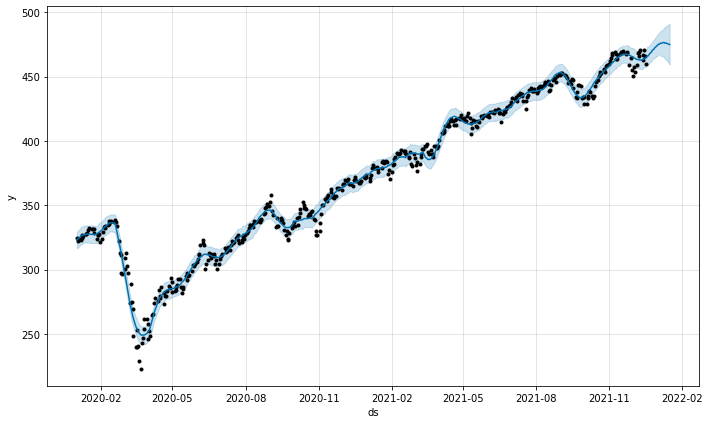

In [15]:
#plot은 트렌드와 함께 예측된 결과물을 시각화하여 보여줍니다.
fig = m.plot(forecast)

In [16]:
#plotly 활용
fig = plot_plotly(m, forecast)
fig

In [17]:
#컴포넌트 별 시각화
#컴포넌트 별 시각화에서는 seasonality 별 시각화를 진행해 볼 수 있습니다.
#trend, yearly, weekly 데이터를 시각화하여 보여 줍니다.

plot_components_plotly(m, forecast)

change points
By default, Prophet specifies 25 potential changepoints which are uniformly placed in the first 80% of the time series. The vertical lines in this figure indicate where the potential changepoints were placed:

처음 80%의 시계열 데이터에 대하여 잠재적인 25개의 changepoints를 만들고, 그 중 선별하여 최종 changepoints를 그래프에서 vertical line으로 그려주게 됩니다.

In [18]:
from fbprophet.plot import add_changepoints_to_plot

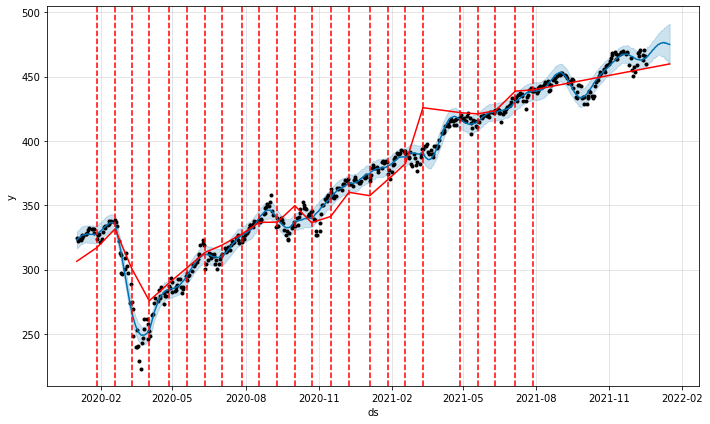

In [19]:
fig = m.plot(forecast)
a = add_changepoints_to_plot(fig.gca(), m, forecast)

In [20]:
# 아래 파라미터 조정 보통 changepoint_prior_scale= 0.05로 되어있음 

In [21]:
#m = Prophet(changepoint_prior_scale=0.8,            yearly_seasonality=True,            daily_seasonality=True            )
#forecast = m.fit(A).predict(future)
#fig = m.plot(forecast)

In [22]:
#m = Prophet(changepoint_prior_scale=0.01,            yearly_seasonality=True,            daily_seasonality=True            )
#forecast = m.fit(A).predict(future)
#fig = m.plot(forecast)

In [25]:
Close = A['Close']
yhat = forecast[['yhat']].iloc[0:496]

In [26]:
# RMSE
from sklearn.metrics import mean_squared_error 
MSE = mean_squared_error(Close, yhat) 
np.sqrt(MSE)

5.288016384846243